## Machine Learning Algorithms

### Intrusion Detection Systems (IDS)

- Anomaly detection or Outlier Detection is the identification of items, events or observations which do not conform to an expected pattern or other items in a dataset.

- Intrusion Detection Systems are practical implementations of Anomaly Detectors that are intended to identify and later possibly act on any "abnormal" behavior.


### Supervised Vs. Unsupervised?

- Broadly, there are two kinds of Machine Learning Algorithms: Supervised Methods and Unsupervised Methods.
- The difference is that Supervised Methods require labels for the data while Unsupervised Methods do not.
- In performing Anomaly Detection we generally do not have data from the anomalous class.

### Machine Learning Algorithms for IDS 

Based on prior work (see Sabahar and Movaghar, 2008, IEEE for survey), these are some of the commonly used ML algorithms for Intrusion Detection:
- Distance/Similarity Metrics: Manhattan Distance, Euclidean Distance, Mahalanobis Distance and their Scaled Versions.
- Neural Networks
- Support Vector Machines (One Class Variant)
- Self-Organizing (Kohonen) Maps
- Fuzzy Logic
- Density Estimation
- Subspace and Correlation based Outlier Detection

### One Class Support Vector Machines

- Trained on only one class of data. 
- Has to predict whether a new input belongs to the class.
- Hyperparameters used:
 - $\nu = \{0.01, 0.05, 0.1\}$
      - Controls the number of Support Vectors and the approximate fraction of the training set misclassified (taken as outliers).
 - Kernel Function
      - Used Linear and Radial Basis Function Kernel.

In [46]:
import Parser

# For checking if file exists
import os

# For Data Analysis
import pandas

filename = "Sample Data"
XMLStructureFilename = "canstructure.xml"
raw_data = True

df = pandas.DataFrame()

if raw_data:
    if not os.path.isfile(filename + ".parsed_raw_data"):
        df = Parser.get_raw_data(filename, XMLStructureFilename)
        Parser.save_parsed_data_to_file(dataframe=df, filename=filename + ".parsed_raw_data")
    else:
        df = Parser.load_parsed_data_from_file(filename + ".parsed_raw_data")

else:
    if not os.path.isfile(filename + ".parsed_encoded_data"):
        df = Parser.get_label_encoded_data(filename)
        Parser.save_parsed_data_to_file(dataframe=df, filename=filename + ".parsed_encoded_data")
    else:
        df = Parser.load_parsed_data_from_file(filename + ".parsed_encoded_data")

In [3]:
import SVM
from sklearn.externals import joblib

nonlinear_nu_point01 = joblib.load('Sample Data_RBF_nu=0.01.fitted_SVM_model')
nonlinear_nu_point05 = joblib.load('Sample Data_RBF_nu=0.05.fitted_SVM_model')
nonlinear_nu_point1 = joblib.load('Sample Data_RBF_nu=0.1.fitted_SVM_model')

In [12]:
import SVM
from sklearn.externals import joblib

linear_nu_point01 = joblib.load('Sample Data_linear_nu=0.01.fitted_SVM_model')
linear_nu_point05 = joblib.load('Sample Data_linear_nu=0.05.fitted_SVM_model')
linear_nu_point1 = joblib.load('Sample Data_linear_nu=0.1.fitted_SVM_model')

In [171]:
import keras
import LSTMAnomalyDetector

model25_10 = LSTMAnomalyDetector.LSTMAnomalyDetector(df, 25, 10, False)
model25_10.load_weights('LSTMAD_(25, 10).h5')

In [169]:
import SOM

training_set_fraction = 0.7
training_data = df.loc[:training_set_fraction * df.shape[0]]

SOMModels = {3 : None, 5 : None, 7 : None, 10: None}

def trainSOMs():
    for k in SOMModels.keys():
        som = SOM.trainSOM(training_data, k, k)
        SOMModels[k] = som

trainSOMs()

In [ ]:
testing_set_fraction = 1 - training_set_fraction
testing_data_non_anomalous =  df.loc[training_set_fraction * df.shape[0]:]

import Noise
import imp
imp.reload(Noise)
import pandas

from tqdm import tqdm
import numpy as np
testing_data_switched_hex = {0.1: [], 0.2: [], 0.4: [], 0.6: [], 0.8: []}
for k in testing_data_switched_hex.keys():
    df_t = df.loc[np.random.choice(range(df.shape[0]), size = testing_set_fraction * df.shape[0])]
    testing_data_switched_hex[k].append(Noise.switch_hex(
            df_t, prob=k))

In [188]:
from tqdm import tqdm
import numpy as np
testing_data_with_gaussian_noised_timestamp = {(0, 0.01): [], (0, 0.05): [], (0, 0.1): [], 
                                               (0, 0.2): [], (0, 0.5): [], (0, 1): []}
for k in testing_data_with_gaussian_noised_timestamp.keys():
    df_t = df.loc[np.random.choice(range(df.shape[0]), size = testing_set_fraction * df.shape[0])]
    testing_data_with_gaussian_noised_timestamp[k].append(Noise.add_gaussian_noise(
            df_t, mean=k[0], variance=k[1]))

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [ ]:
from sklearn.metrics import confusion_matrix

nonlinear_nu_point01pred = nonlinear_nu_point01.predict(testing_data_non_anomalous)
nonlinear_nu_point05pred = nonlinear_nu_point05.predict(testing_data_non_anomalous)
nonlinear_nu_point1pred = nonlinear_nu_point1.predict(testing_data_non_anomalous)
linear_nu_point01pred = linear_nu_point01.predict(testing_data_non_anomalous)
linear_nu_point05pred = linear_nu_point05.predict(testing_data_non_anomalous)
linear_nu_point1pred = linear_nu_point1.predict(testing_data_non_anomalous)

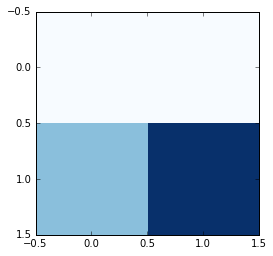

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt

# Confusion Matrices Illustration
plt.imshow(confusion_matrix([1] * len(nonlinear_nu_point01pred), nonlinear_nu_point01pred, labels=[-1, 1]), interpolation='nearest', cmap=plt.cm.Blues)

In [211]:
# Nonlinear Kernel Training
print("RBF Kernel, nu = 0.01")
print(confusion_matrix([1] * len(nonlinear_nu_point01pred), nonlinear_nu_point01pred, labels=[-1, 1]))
print("RBF Kernel, nu = 0.05")
print(confusion_matrix([1] * len(nonlinear_nu_point05pred), nonlinear_nu_point05pred, labels=[-1, 1]))
print("RBF Kernel, nu = 0.1")
print(confusion_matrix([1] * len(nonlinear_nu_point1pred), nonlinear_nu_point1pred, labels=[-1, 1]))

RBF Kernel, nu = 0.01
[[    0     0]
 [10735 25442]]
RBF Kernel, nu = 0.05
[[    0     0]
 [11284 24893]]
RBF Kernel, nu = 0.1
[[    0     0]
 [11560 24617]]


In [200]:
# Linear Kernel Training
print("Linear Kernel, nu = 0.01")
print(confusion_matrix([1] * len(linear_nu_point01pred), linear_nu_point01pred, labels=[-1, 1]))
print("Linear Kernel, nu = 0.05")
print(confusion_matrix([1] * len(linear_nu_point05pred), linear_nu_point05pred, labels=[-1, 1]))
print("Linear Kernel, nu = 0.1")
print(confusion_matrix([1] * len(linear_nu_point1pred), linear_nu_point1pred, labels=[-1, 1]))

Linear Kernel, nu = 0.01
[[    0     0]
 [    0 36177]]
Linear Kernel, nu = 0.05
[[    0     0]
 [    0 36177]]
Linear Kernel, nu = 0.1
[[    0     0]
 [    0 36177]]


### Fuzzing (Testing Anomaly Detection)

- The CAN packet data is in tne following format: UNIX_TIMESTAMP [16 Hex Digits]

- We used two main methods for introducing anomalies: 
 - Change a fraction of the Hex Digits to some random Hex Digit.
      - Probabilities $p \in \{0.2, 0.4, 0.6, 0.8\}$
 - Add Gaussian Noise to the Timestamp field.
      -  $\mu = 0$, $\sigma \in \{0.01, 0.05, 0.1, 0.2, 0.5, 1\}$

In [ ]:
from sklearn.metrics import confusion_matrix
nonlinear_nu_point01predAnomalousHex = nonlinear_nu_point01.predict(testing_data_switched_hex[0.1][0])
nonlinear_nu_point05predAnomalousHex = nonlinear_nu_point05.predict(testing_data_switched_hex[0.1][0])
nonlinear_nu_point1predAnomalousHex = nonlinear_nu_point1.predict(testing_data_switched_hex[0.1][0])
linear_nu_point01predAnomalousHex = linear_nu_point01.predict(testing_data_switched_hex[0.1][0])
linear_nu_point05predAnomalousHex = linear_nu_point05.predict(testing_data_switched_hex[0.1][0])
linear_nu_point1predAnomalousHex = linear_nu_point1.predict(testing_data_switched_hex[0.1][0])

In [194]:
print(confusion_matrix([-1] * len(nonlinear_nu_point01predAnomalousHex), nonlinear_nu_point01predAnomalousHex, labels=[-1, 1]))
print(confusion_matrix([-1] * len(nonlinear_nu_point05predAnomalousHex), nonlinear_nu_point05predAnomalousHex, labels=[-1, 1]))
print(confusion_matrix([-1] * len(nonlinear_nu_point1predAnomalousHex), nonlinear_nu_point1predAnomalousHex, labels=[-1, 1]))

[[ 3429 32748]
 [    0     0]]
[[ 4496 31681]
 [    0     0]]
[[ 5817 30360]
 [    0     0]]


In [198]:
print("Linear Kernel, nu = 0.01")
print(confusion_matrix([-1] * len(linear_nu_point01predAnomalousHex), linear_nu_point01predAnomalousHex, labels=[-1, 1]))
print("Linear Kernel, nu = 0.05")
print(confusion_matrix([-1] * len(linear_nu_point05predAnomalousHex), linear_nu_point05predAnomalousHex, labels=[-1, 1]))
print("Linear Kernel, nu = 0.1")
print(confusion_matrix([-1] * len(linear_nu_point1predAnomalousHex), linear_nu_point1predAnomalousHex, labels=[-1, 1]))

Linear Kernel, nu = 0.01
[[  244 35933]
 [    0     0]]
Linear Kernel, nu = 0.05
[[ 1265 34912]
 [    0     0]]
Linear Kernel, nu = 0.1
[[ 2483 33694]
 [    0     0]]


In [ ]:
from sklearn.metrics import confusion_matrix
nonlinear_nu_point01predAnomalousHex = nonlinear_nu_point01.predict(testing_data_switched_hex[0.2][0])
nonlinear_nu_point05predAnomalousHex = nonlinear_nu_point05.predict(testing_data_switched_hex[0.2][0])
nonlinear_nu_point1predAnomalousHex = nonlinear_nu_point1.predict(testing_data_switched_hex[0.2][0])
linear_nu_point01predAnomalousHex = linear_nu_point01.predict(testing_data_switched_hex[0.2][0])
linear_nu_point05predAnomalousHex = linear_nu_point05.predict(testing_data_switched_hex[0.2][0])
linear_nu_point1predAnomalousHex = linear_nu_point1.predict(testing_data_switched_hex[0.2][0])

In [212]:
# Switch Hex Prob=0.2, NonLinear Kernel OCSVM
print("RBF Kernel, nu = 0.01")
print(confusion_matrix([-1] * len(nonlinear_nu_point01predAnomalousHex), nonlinear_nu_point01predAnomalousHex, labels=[-1, 1]))
print("RBF Kernel, nu = 0.05")
print(confusion_matrix([-1] * len(nonlinear_nu_point05predAnomalousHex), nonlinear_nu_point05predAnomalousHex, labels=[-1, 1]))
print("RBF Kernel, nu = 0.1")
print(confusion_matrix([-1] * len(nonlinear_nu_point1predAnomalousHex), nonlinear_nu_point1predAnomalousHex, labels=[-1, 1]))

RBF Kernel, nu = 0.01
[[ 3429 32748]
 [    0     0]]
RBF Kernel, nu = 0.05
[[ 4496 31681]
 [    0     0]]
RBF Kernel, nu = 0.1
[[ 5817 30360]
 [    0     0]]


In [213]:
# Switch Hex Prob=0.2, NonLinear Kernel OCSVM
print("Linear Kernel, nu = 0.01")
print(confusion_matrix([-1] * len(linear_nu_point01predAnomalousHex), linear_nu_point01predAnomalousHex, labels=[-1, 1]))
print("Linear Kernel, nu = 0.05")
print(confusion_matrix([-1] * len(linear_nu_point05predAnomalousHex), linear_nu_point05predAnomalousHex, labels=[-1, 1]))
print("Linear Kernel, nu = 0.1")
print(confusion_matrix([-1] * len(linear_nu_point1predAnomalousHex), linear_nu_point1predAnomalousHex, labels=[-1, 1]))

Linear Kernel, nu = 0.01
[[  244 35933]
 [    0     0]]
Linear Kernel, nu = 0.05
[[ 1265 34912]
 [    0     0]]
Linear Kernel, nu = 0.1
[[ 2483 33694]
 [    0     0]]


In [148]:
from sklearn.metrics import confusion_matrix

nonlinear_nu_point01predAnomalousHex = nonlinear_nu_point01.predict(testing_data_switched_hex[0.4][0])
print(confusion_matrix([-1] * len(nonlinear_nu_point01predAnomalousHex), nonlinear_nu_point01predAnomalousHex, labels=[-1, 1]))

nonlinear_nu_point05predAnomalousHex = nonlinear_nu_point05.predict(testing_data_switched_hex[0.4][0])
print(confusion_matrix([-1] * len(nonlinear_nu_point05predAnomalousHex), nonlinear_nu_point05predAnomalousHex, labels=[-1, 1]))

nonlinear_nu_point1predAnomalousHex = nonlinear_nu_point1.predict(testing_data_switched_hex[0.4][0])
print(confusion_matrix([-1] * len(nonlinear_nu_point1predAnomalousHex), nonlinear_nu_point1predAnomalousHex, labels=[-1, 1]))

linear_nu_point01predAnomalousHex = linear_nu_point01.predict(testing_data_switched_hex[0.4][0])
print(confusion_matrix([-1] * len(linear_nu_point01predAnomalousHex), linear_nu_point01predAnomalousHex, labels=[-1, 1]))

linear_nu_point05predAnomalousHex = linear_nu_point05.predict(testing_data_switched_hex[0.4][0])
print(confusion_matrix([-1] * len(linear_nu_point05predAnomalousHex), linear_nu_point05predAnomalousHex, labels=[-1, 1]))

linear_nu_point1predAnomalousHex = linear_nu_point1.predict(testing_data_switched_hex[0.4][0])
print(confusion_matrix([-1] * len(linear_nu_point1predAnomalousHex), linear_nu_point1predAnomalousHex, labels=[-1, 1]))

[[ 3548 32629]
 [    0     0]]
[[ 4640 31537]
 [    0     0]]
[[ 5942 30235]
 [    0     0]]
[[  237 35940]
 [    0     0]]
[[ 1223 34954]
 [    0     0]]
[[ 2513 33664]
 [    0     0]]


In [149]:
from sklearn.metrics import confusion_matrix

nonlinear_nu_point01predAnomalousHex = nonlinear_nu_point01.predict(testing_data_switched_hex[0.6][0])
print(confusion_matrix([-1] * len(nonlinear_nu_point01predAnomalousHex), nonlinear_nu_point01predAnomalousHex, labels=[-1, 1]))

nonlinear_nu_point05predAnomalousHex = nonlinear_nu_point05.predict(testing_data_switched_hex[0.6][0])
print(confusion_matrix([-1] * len(nonlinear_nu_point05predAnomalousHex), nonlinear_nu_point05predAnomalousHex, labels=[-1, 1]))

nonlinear_nu_point1predAnomalousHex = nonlinear_nu_point1.predict(testing_data_switched_hex[0.6][0])
print(confusion_matrix([-1] * len(nonlinear_nu_point1predAnomalousHex), nonlinear_nu_point1predAnomalousHex, labels=[-1, 1]))

linear_nu_point01predAnomalousHex = linear_nu_point01.predict(testing_data_switched_hex[0.6][0])
print(confusion_matrix([-1] * len(linear_nu_point01predAnomalousHex), linear_nu_point01predAnomalousHex, labels=[-1, 1]))

linear_nu_point05predAnomalousHex = linear_nu_point05.predict(testing_data_switched_hex[0.6][0])
print(confusion_matrix([-1] * len(linear_nu_point05predAnomalousHex), linear_nu_point05predAnomalousHex, labels=[-1, 1]))

linear_nu_point1predAnomalousHex = linear_nu_point1.predict(testing_data_switched_hex[0.6][0])
print(confusion_matrix([-1] * len(linear_nu_point1predAnomalousHex), linear_nu_point1predAnomalousHex, labels=[-1, 1]))

[[ 3421 32756]
 [    0     0]]
[[ 4609 31568]
 [    0     0]]
[[ 5876 30301]
 [    0     0]]
[[  245 35932]
 [    0     0]]
[[ 1250 34927]
 [    0     0]]
[[ 2545 33632]
 [    0     0]]


In [ ]:
from sklearn.metrics import confusion_matrix
nonlinear_nu_point01predAnomalousHex = nonlinear_nu_point01.predict(testing_data_switched_hex[0.8][0])
nonlinear_nu_point05predAnomalousHex = nonlinear_nu_point05.predict(testing_data_switched_hex[0.8][0])
nonlinear_nu_point1predAnomalousHex = nonlinear_nu_point1.predict(testing_data_switched_hex[0.8][0])

In [215]:
linear_nu_point01predAnomalousHex = linear_nu_point01.predict(testing_data_switched_hex[0.8][0])
linear_nu_point05predAnomalousHex = linear_nu_point05.predict(testing_data_switched_hex[0.8][0])
linear_nu_point1predAnomalousHex = linear_nu_point1.predict(testing_data_switched_hex[0.8][0])

### Higher Probabilities - Intution?

- Easier?: Increasing the number of Hex Digits that are changed should ideally make an Anomaly Detection easier.
- Harder?: Changing too many Hex Digits can cause the packet to seem valid.

In [216]:
# Switch Hex Prob=0.8, NonLinear Kernel OCSVM
print("RBF Kernel, nu = 0.01")
print(confusion_matrix([-1] * len(nonlinear_nu_point01predAnomalousHex), nonlinear_nu_point01predAnomalousHex, labels=[-1, 1]))
print("RBF Kernel, nu = 0.05")
print(confusion_matrix([-1] * len(nonlinear_nu_point05predAnomalousHex), nonlinear_nu_point05predAnomalousHex, labels=[-1, 1]))
print("RBF Kernel, nu = 0.1")
print(confusion_matrix([-1] * len(nonlinear_nu_point1predAnomalousHex), nonlinear_nu_point1predAnomalousHex, labels=[-1, 1]))

RBF Kernel, nu = 0.01
[[ 3429 32748]
 [    0     0]]
RBF Kernel, nu = 0.05
[[ 4496 31681]
 [    0     0]]
RBF Kernel, nu = 0.1
[[ 5817 30360]
 [    0     0]]


In [217]:
# Switch Hex Prob=0.2, Linear Kernel OCSVM
print("Linear Kernel, nu = 0.01")
print(confusion_matrix([-1] * len(linear_nu_point01predAnomalousHex), linear_nu_point01predAnomalousHex, labels=[-1, 1]))
print("Linear Kernel, nu = 0.05")
print(confusion_matrix([-1] * len(linear_nu_point05predAnomalousHex), linear_nu_point05predAnomalousHex, labels=[-1, 1]))
print("Linear Kernel, nu = 0.1")
print(confusion_matrix([-1] * len(linear_nu_point1predAnomalousHex), linear_nu_point1predAnomalousHex, labels=[-1, 1]))

Linear Kernel, nu = 0.01
[[  244 35933]
 [    0     0]]
Linear Kernel, nu = 0.05
[[ 1265 34912]
 [    0     0]]
Linear Kernel, nu = 0.1
[[ 2483 33694]
 [    0     0]]


### OCSVM Results Summary (1)
- Similar results on Gaussian Noised timestamps.
- Linear Kernels works quite well.
- Many ML researchers such as Andrew Ng. have suggested that linear kernels should be used when there are a lot of datapoints.
    - Nonlinear Kernels generally take a long time to optimize when there are many datapoints (the training set used contains approximately 130,000 points), tolerance not low enough. 

### OCSVM Results Summary (2)

- Quite good results! With the Linear Kernel with $\nu = 0.01$:
 - 0.07369264557% false positive rate  when probability = 0.2 is used for Hex Switching, and, 
 - 0.103044452% false positive rate when using Gaussian Noise with $\sigma = 0.01$

### Self-Organizing Map (Kohonen Map)

- Special Type of Neural Network.
- Can be thought of as a Fully Connected Grid that performs dimensionality reduction.

![title](SOM_IMAGES/Cue_Distance_Heatmap_0.png)

In [218]:
### Self-Organizing Map (Kohonen Map)

import SOM

print("Average Distance with 3x3 SOM for training set: " + str(np.average(SOMModels[3].distances(training_data))))
print("Average Distance with 5x5 SOM for training set: " + str(np.average(SOMModels[5].distances(training_data))))
print("Average Distance with 7x7 SOM for training set: " + str(np.average(SOMModels[7].distances(training_data))))

Average Distance with 3x3 SOM for training set: 22.5831233731
Average Distance with 5x5 SOM for training set: 28.3443649242
Average Distance with 7x7 SOM for training set: 31.1494448656


In [222]:
# Test Data without Anomalies

print("Average Distance with 3x3 SOM for non-anomalous testing set: " + 
      str(np.average(SOMModels[3].distances(testing_data_non_anomalous))))
print("Average Distance with 5x5 SOM for non-anomalous testing set: " + 
      str(np.average(SOMModels[5].distances(testing_data_non_anomalous))))
print("Average Distance with 7x7 SOM for non-anomalous testing set: " + 
          str(np.average(SOMModels[7].distances(testing_data_non_anomalous))))

Average Distance with 3x3 SOM for non-anomalous testing set: 131.399610135
Average Distance with 5x5 SOM for non-anomalous testing set: 128.593592325
Average Distance with 7x7 SOM for non-anomalous testing set: 127.411091128


In [186]:
docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_non_anomalous) - n_prev)):
    docX.append(testing_data_non_anomalous.iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_non_anomalous.iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_non_anomalous = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_switched_hex[0.1][0]) - n_prev)):
    docX.append(testing_data_switched_hex[0.1][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_switched_hex[0.1][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)
predictions_switched_hex_point1 = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_switched_hex[0.2][0]) - n_prev)):
    docX.append(testing_data_switched_hex[0.2][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_switched_hex[0.2][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_switched_hex_point2 = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_switched_hex[0.4][0]) - n_prev)):
    docX.append(testing_data_switched_hex[0.4][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_switched_hex[0.4][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_switched_hex_point4 = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_switched_hex[0.6][0]) - n_prev)):
    docX.append(testing_data_switched_hex[0.6][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_switched_hex[0.6][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_switched_hex_point6 = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_switched_hex[0.8][0]) - n_prev)):
    docX.append(testing_data_switched_hex[0.8][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_switched_hex[0.8][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_switched_hex_point8 = model25_10.predict(np.array(alsX))

In [190]:
docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_with_gaussian_noised_timestamp[(0, 0.01)][0]) - n_prev)):
    docX.append(testing_data_with_gaussian_noised_timestamp[(0, 0.01)][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_with_gaussian_noised_timestamp[(0, 0.01)][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_gauss_noise_point01 = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_with_gaussian_noised_timestamp[(0, 0.05)][0]) - n_prev)):
    docX.append(testing_data_with_gaussian_noised_timestamp[(0, 0.05)][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_with_gaussian_noised_timestamp[(0, 0.05)][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_gauss_noise_point05 = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_with_gaussian_noised_timestamp[(0, 0.1)][0]) - n_prev)):
    docX.append(testing_data_with_gaussian_noised_timestamp[(0, 0.1)][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_with_gaussian_noised_timestamp[(0, 0.1)][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_gauss_noise_point1 = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_with_gaussian_noised_timestamp[(0, 0.5)][0]) - n_prev)):
    docX.append(testing_data_with_gaussian_noised_timestamp[(0, 0.5)][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_with_gaussian_noised_timestamp[(0, 0.5)][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_gauss_noise_point5 = model25_10.predict(np.array(alsX))

docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_with_gaussian_noised_timestamp[(0, 1)][0]) - n_prev)):
    docX.append(testing_data_with_gaussian_noised_timestamp[(0, 1)][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_with_gaussian_noised_timestamp[(0, 1)][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_gauss_noise_1 = model25_10.predict(np.array(alsX))

In [264]:
docX, docY = [], []
n_prev = 25
for i in tqdm(range(len(testing_data_with_gaussian_noised_timestamp[(0, 0.2)][0]) - n_prev)):
    docX.append(testing_data_with_gaussian_noised_timestamp[(0, 0.2)][0].iloc[i:i+n_prev].as_matrix())
    docY.append(testing_data_with_gaussian_noised_timestamp[(0, 0.2)][0].iloc[i+n_prev].as_matrix())
alsX = np.array(docX)
alsY = np.array(docY)

predictions_gauss_noise_point2 = model25_10.evaluate(np.array(alsX), np.array(alsY), batch_size=1)

10764/62996 [====>.........................] - ETA: 697s

KeyboardInterrupt: 

### Using Sequences: Long Short Term Memory Anomaly Detection

- Neural Network that accepts a sequence of data and outputs a sequence of data.
- Hyperparameters Used: 
     - Number of Unrolling Timesteps $\in \{25, 50\}$
     - Number of Neurons in the single Hidden Layer $\in \{10, 20, 50\}$

![Image](1.jpg)

### Adding Noise when using Sequences

- For testing Anomaly Detection for LSTMs, we introduced Gaussian Noise in the timestamps based on an exponential distribution with scale parameter $\beta = 100$ 

### LSTM Experiments and Results

- 100 packets were passed as input with a sliding window.
- 25 Last Packets with a hidden layer of 10 units with an error rate with the exponentially distributed noise gives the best false positive error rate of 0.035%
- Sequences help!